# Download Stock Market

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import yfinance as yf

In [2]:
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*5)

start_date

datetime.datetime(2019, 9, 6, 18, 40, 16, 374432)

In [3]:
stocks = ["SPY"]
df = yf.download(stocks, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-06,298.170013,298.760010,297.420013,298.049988,275.477081,49584300
2019-09-09,299.140015,299.239990,297.160004,298.200012,275.615784,51260300
2019-09-10,297.359985,298.200012,295.970001,298.130005,275.550964,57947100
2019-09-11,298.470001,300.339996,297.750000,300.250000,277.510559,68821100
2019-09-12,301.250000,302.459991,300.410004,301.290009,278.471771,72908700


<Axes: xlabel='Date'>

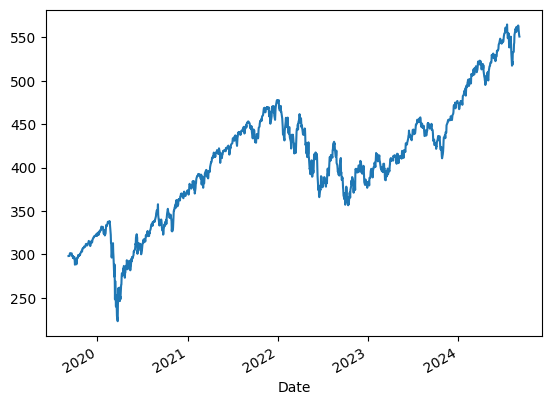

In [5]:
df["Close"].plot()

# Indicators

In [6]:
from ta.utils import dropna
from ta.volatility import BollingerBands

In [7]:
# Clean NaN values
df = dropna(df)

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

df_bb = pd.DataFrame(index=df.index)
df_bb['bb_bbm'] = indicator_bb.bollinger_mavg()
df_bb['bb_bbh'] = indicator_bb.bollinger_hband()
df_bb['bb_bbl'] = indicator_bb.bollinger_lband()
df_bb['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
df_bb['bb_bbli'] = indicator_bb.bollinger_lband_indicator()


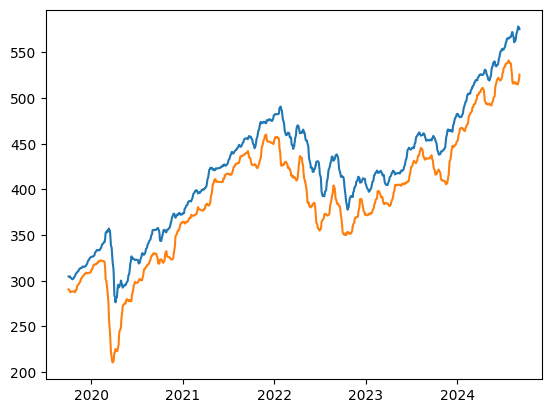

In [8]:
plt.plot(indicator_bb.bollinger_hband())
plt.plot(indicator_bb.bollinger_lband())

In [9]:
df_bb.tail()

,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli
Date,,,,,
2024-08-28,545.105499,575.250837,514.960162,0.0,0.0
2024-08-29,545.872498,576.541590,515.203405,0.0,0.0
2024-08-30,547.411496,578.409618,516.413374,0.0,0.0
2024-09-03,549.146497,576.946201,521.346792,0.0,0.0
2024-09-04,550.586496,575.474602,525.698390,0.0,0.0


# Indicator Dynamic Loader

In [10]:
import pandas as pd
from ta.volatility import BollingerBands

# Diccionario que mapea nombres de indicadores a clases y métodos de la librería ta
indicator_map = {
    "bollinger_bands": {
        "class": BollingerBands,
        "stock_parameters": ["Close"],
        "methods": {
            "bb_bbm": BollingerBands.bollinger_mavg,
            "bb_bbh": BollingerBands.bollinger_hband,
            "bb_bbl": BollingerBands.bollinger_lband,
            "bb_bbhi": BollingerBands.bollinger_hband_indicator,
            "bb_bbli": BollingerBands.bollinger_lband_indicator
        }
    },
}

def calculate_indicator(indicator_name, stock_market: pd.DataFrame, **kwargs):
    if indicator_name not in indicator_map:
        raise ValueError(f"Indicador '{indicator_name}' no está soportado.")
    
    # Obtener la clase correspondiente del indicador
    indicator_info = indicator_map[indicator_name]
    indicator_class = indicator_info["class"]
    
    # Inicializar el indicador con los argumentos que recibiste en kwargs
    stock_kwargs = {col.lower():stock_market[col] for col in indicator_info["stock_parameters"]}
    indicator = indicator_class(**stock_kwargs, **kwargs)

    # Crear una copia del DataFrame para no modificar el original
    df_result = df.copy()

    # Iterar sobre los métodos definidos en el diccionario y agregarlos al DataFrame
    for column_name, method in indicator_info["methods"].items():
        df_result[column_name] = method(indicator)
    
    return df_result

In [11]:
result_df = calculate_indicator("bollinger_bands", df)

In [12]:
result_df.tail()

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli
Date,,,,,,,,,,,
2024-08-28,561.210022,561.650024,555.039978,558.299988,558.299988,41066000,545.105499,575.250837,514.960162,0.0,0.0
2024-08-29,560.309998,563.679993,557.179993,558.349976,558.349976,38715200,545.872498,576.541590,515.203405,0.0,0.0
2024-08-30,560.770020,564.200012,557.140015,563.679993,563.679993,62700100,547.411496,578.409618,516.413374,0.0,0.0
2024-09-03,560.469971,560.809998,549.510010,552.080017,552.080017,60491400,549.146497,576.946201,521.346792,0.0,0.0
2024-09-04,550.200012,554.419983,549.460510,550.950012,550.950012,47041465,550.586496,575.474602,525.698390,0.0,0.0


In [13]:
df.iloc[:len(df)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-06,298.170013,298.760010,297.420013,298.049988,275.477081,49584300
2019-09-09,299.140015,299.239990,297.160004,298.200012,275.615784,51260300
2019-09-10,297.359985,298.200012,295.970001,298.130005,275.550964,57947100
2019-09-11,298.470001,300.339996,297.750000,300.250000,277.510559,68821100
2019-09-12,301.250000,302.459991,300.410004,301.290009,278.471771,72908700
...,...,...,...,...,...,...
2024-08-28,561.210022,561.650024,555.039978,558.299988,558.299988,41066000
2024-08-29,560.309998,563.679993,557.179993,558.349976,558.349976,38715200
2024-08-30,560.770020,564.200012,557.140015,563.679993,563.679993,62700100
